In [248]:
import torch
import diffplan
import matplotlib.pyplot as plt
import numpy as np
import itertools
%load_ext autoreload
%autoreload 2
%matplotlib inline

print('torch', torch.__version__)
print('np', np.__version__)

eps = torch.finfo().eps

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
torch 1.2.0
np 1.17.0


In [282]:
x = torch.zeros((2, 10))
y = torch.zeros((2, 10))
y[0, 3] = 1.0
y[1, 4] = 1.0
torch.cat([x, y], axis=0)

torch.Size([4, 10])

In [8]:
env_close = diffplan.Grid('''
xxxxxxxxxxxxxxx
x             x
x             x
x             x
x   S     G   x
x             x
x             x
x             x
xxxxxxxxxxxxxxx
''')

%time env_close.bfs_search_cost = diffplan.compute_bfs_search_cost(env_close)
env_close.rw_search_cost = diffplan.compute_random_walk_search_cost(env_close)

CPU times: user 6.99 s, sys: 48.7 ms, total: 7.04 s
Wall time: 7.24 s


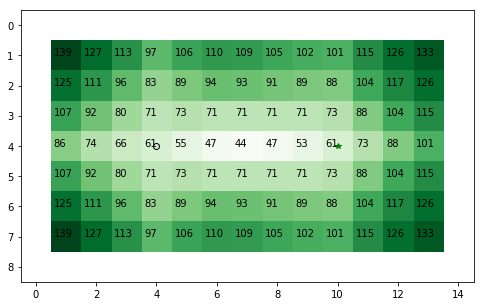

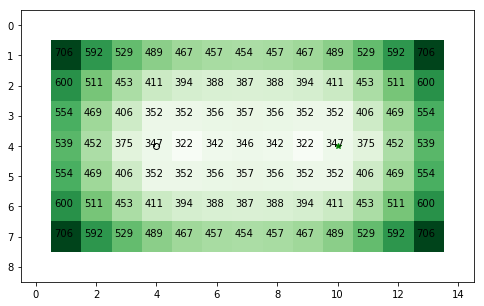

In [256]:
def show_new_option_cost(env, sc, discount=1., figsize=(8, 4)):
    goal_idx = env.states_to_idx[list(env.goal_set)[0]]
    
    f, ax = plt.subplots(figsize=figsize)
    v = sc[env.start_states].mean(0) + discount*sc[:, goal_idx]
    diffplan.plot_grid(env, v, labels=v.int().detach().tolist(), f=f, ax=ax, start_states=env.start_states, colorbar=False)

show_new_option_cost(env_close, env_close.bfs_search_cost, figsize=(10, 5))
plt.savefig('open-bfs-cost.pdf', bbox_inches='tight')
show_new_option_cost(env_close, env_close.rw_search_cost, figsize=(10, 5))
plt.savefig('open-rw-cost.pdf', bbox_inches='tight')

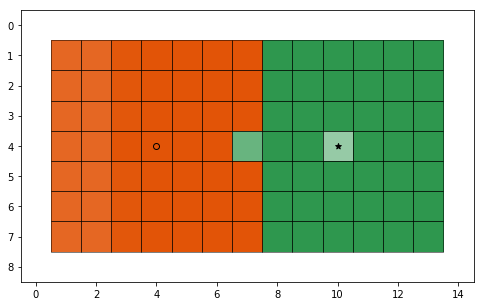

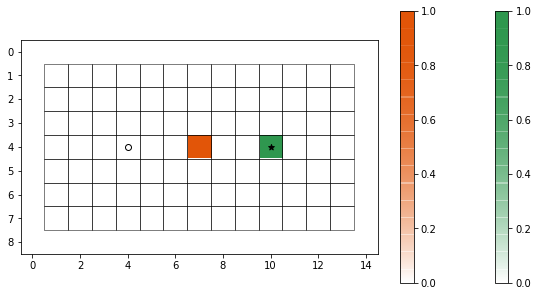

In [250]:
ot = diffplan.make_option_terminations(env_close, [(4, 10), (4, 7)])
J, V, Q, policy, eta = diffplan.option_planner_bfs_vec(env_close, ot, env_close.bfs_search_cost)
f, ax = plt.subplots(figsize=(10, 5))
diffplan.show_policy_or_eta(env_close, policy, colorbar=False)
f, ax = plt.subplots(figsize=(10, 5))
diffplan.show_policy_or_eta(env_close, eta.T)

In [257]:
def ol(*args, colorbar=True, savefig=None, **kwargs):
    d=diffplan.option_learner(*args, **kwargs)
    J, V, Q, policy, eta = d[1]

    fmeta, axmeta = plt.subplots(figsize=(10, 5))
    diffplan.show_policy_or_eta(args[0], policy, colorbar=colorbar)

    f, ax = plt.subplots(figsize=(10, 5))
    diffplan.show_policy_or_eta(args[0], eta.T, colorbar=colorbar)

    if savefig is not None:
        fmeta.savefig(savefig+'-metapolicy.pdf', bbox_inches='tight')
        f.savefig(savefig+'-eta.pdf', bbox_inches='tight')

    axmeta.set(title='Meta-policy')#, fc='white')
    ax.set(title=r'$\eta$')#, fc='white')

    return d

seed 240864223
9 188.55152893066406
19 56.8390007019043
29 41.581932067871094
39 37.751285552978516
49 36.29899597167969
59 35.559181213378906
69 35.07482147216797
79 34.69487380981445
89 34.365604400634766
99 34.067405700683594
99 Reset optimizer state
109 29.474815368652344
119 28.159561157226562
129 22.332162857055664
139 18.959245681762695
149 17.839584350585938
159 17.67032814025879
169 17.641420364379883
179 17.632837295532227
189 17.623088836669922
199 17.618507385253906
199 Reset optimizer state
CPU times: user 5.08 s, sys: 186 ms, total: 5.27 s
Wall time: 5.19 s


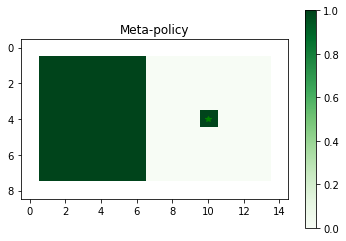

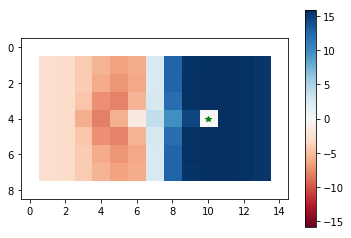

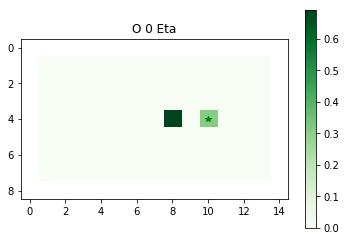

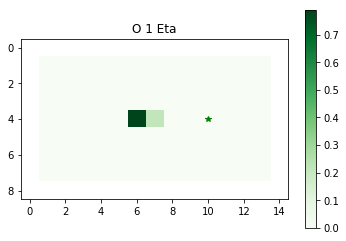

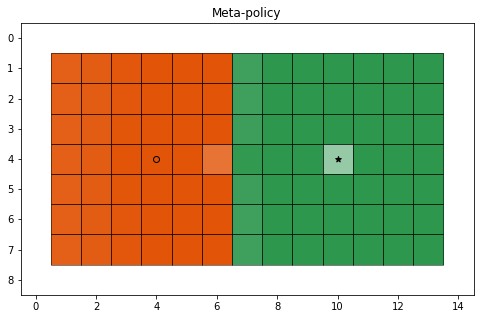

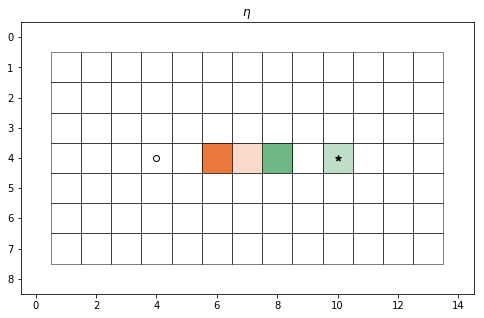

In [259]:
%time d=ol(env_close, seed=240864223, colorbar=False, savefig='open', reset=100, search_cost=0.5*env_close.bfs_search_cost, progress=10, grad_steps=200, lr=0.2, num_options=2)
# 240864223 36.6260


seed 240864223
9 218.05535888671875
19 65.80661010742188
29 47.9573974609375
39 43.431243896484375
49 41.704010009765625
59 40.81959533691406
69 40.23835372924805
79 39.78152847290039
89 39.38542175292969
99 39.026771545410156
99 Reset optimizer state
109 33.598480224609375
119 33.35602569580078
129 32.5972785949707
139 31.72456169128418
149 29.90370750427246
159 29.3289737701416
169 29.304616928100586
179 29.29994773864746
189 29.29728889465332
199 29.295307159423828
199 Reset optimizer state
CPU times: user 3.73 s, sys: 140 ms, total: 3.87 s
Wall time: 3.73 s


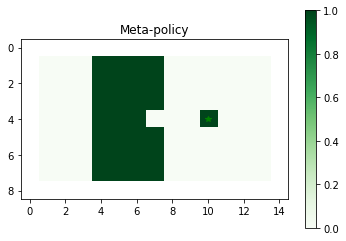

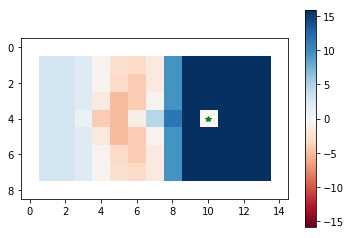

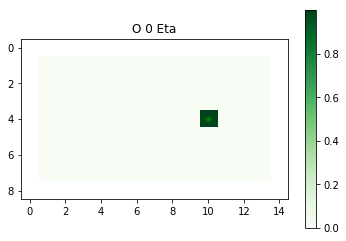

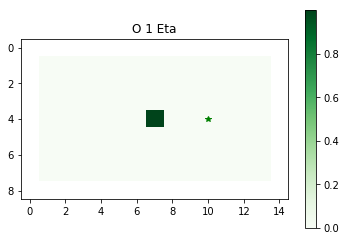

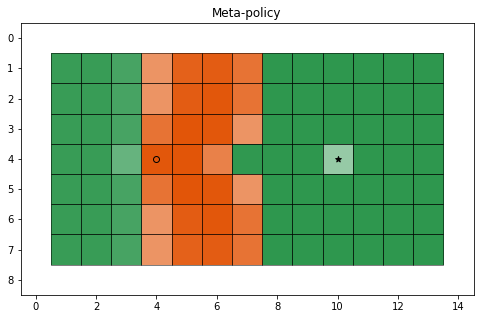

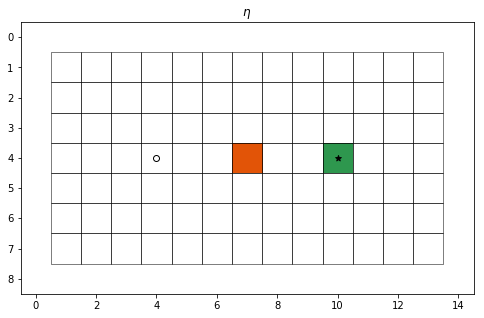

In [260]:
#%time d=diffplan.option_learner(env_close, reset=50, search_cost=3+0.5*env_close.bfs_search_cost, progress=10, grad_steps=100, lr=0.5, num_options=2)
%time d=ol(env_close, seed=240864223, colorbar=False, savefig='open-delib', reset=100, search_cost=4+0.5*env_close.bfs_search_cost, progress=10, grad_steps=200, lr=0.2, num_options=2)


In [ ]:
# dummy rooms??

CPU times: user 8.14 s, sys: 36.5 ms, total: 8.18 s
Wall time: 8.25 s


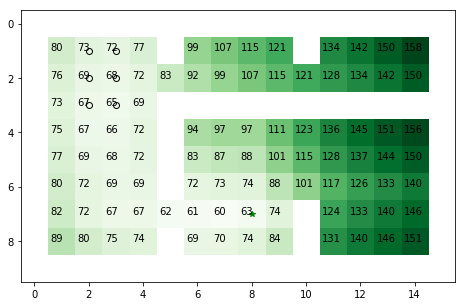

In [274]:
env3 = diffplan.Grid('''
xxxxxxxxxxxxxxxx
x SS x    x    x
x SS           x
x SS xxx xxxxxxx
x    x    x    x
x    x         x
x    x    x    x
x         x    x
x    x    x  G x
xxxxxxxxxxxxxxxx
''')

%time env3.bfs_search_cost = diffplan.compute_bfs_search_cost(env3)
show_new_option_cost(env3, env3.bfs_search_cost, figsize=(10, 5))

In [265]:
env3 = diffplan.Grid('''
xxxxxxxxxxxxxxxx
x SS x    x    x
x SS x         x
x SS x    x    x
x    x    x    x
x         x  G x
x    x    x    x
xxxxxxxxxxxxxxxx
''')

%time env3.bfs_search_cost = diffplan.compute_bfs_search_cost(env3)
env3.rw_search_cost = diffplan.compute_random_walk_search_cost(env3)

CPU times: user 5.24 s, sys: 28.3 ms, total: 5.27 s
Wall time: 5.37 s


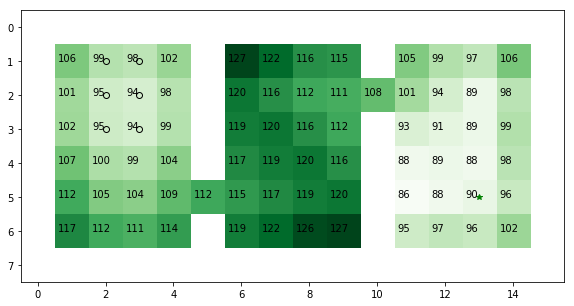

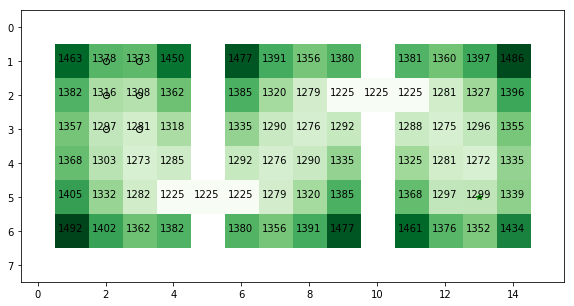

In [258]:
show_new_option_cost(env3, env3.bfs_search_cost, figsize=(10, 5))
plt.savefig('env3-bfs-cost.pdf', bbox_inches='tight')
show_new_option_cost(env3, env3.rw_search_cost, figsize=(10, 5))
plt.savefig('env3-rw-cost.pdf', bbox_inches='tight')

In [270]:
env = env3
env3.rw_search_cost[env3.start_states, env3.states_to_idx[list(env3.goal_set)[0]]]

tensor([1231.7056, 1230.0209, 1228.2753, 1225.6350, 1221.8278, 1216.8210])

seed 214751554
19 211.83522033691406
39 188.5770263671875
59 186.22523498535156
79 185.35841369628906
99 184.7326202392578
119 184.1956024169922
139 183.725341796875
159 183.3140869140625
179 182.95484924316406
199 182.6407928466797


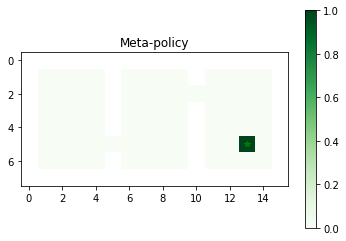

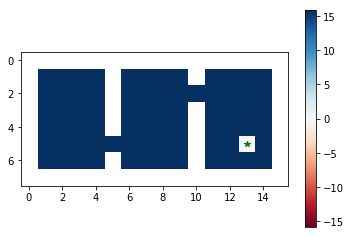

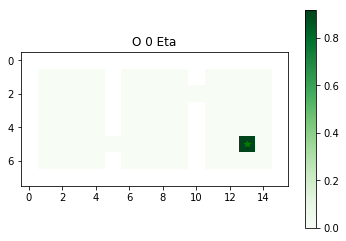

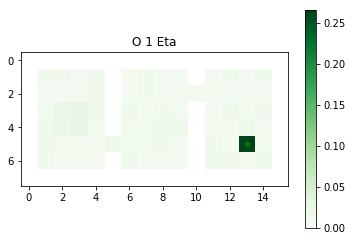

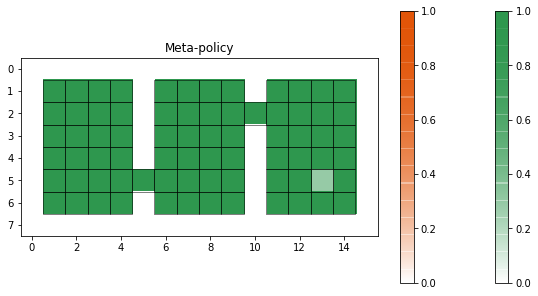

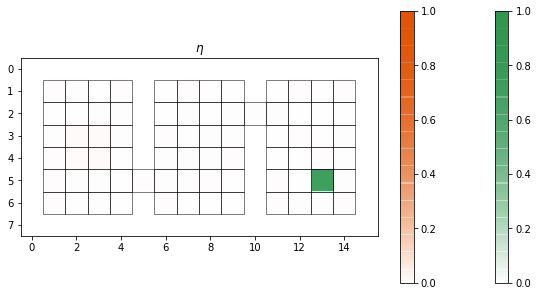

In [215]:
d=ol(env3, search_cost=1+env3.bfs_search_cost*2, progress=20, grad_steps=200, lr=0.2, num_options=2)


[(tensor(24.5219),),
 (tensor(23.0100),),
 (tensor(21.9091),),
 (tensor(21.8093),)]

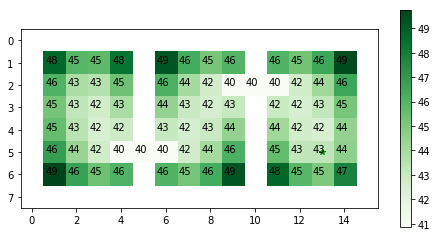

In [17]:
show_new_option_cost(env3, env3.rw_search_cost/30)

def simple_evalute_option_terms(env, option_terms, search_cost, **kwargs):
    terminations = torch.zeros((len(option_terms), len(env.states)))
    for oidx, ot in enumerate(option_terms):
        terminations[oidx, env.states_to_idx[ot]] = 10.
    return diffplan.option_planner_bfs_vec(env, terminations, search_cost, **kwargs)[0],

fn = lambda ot: simple_evalute_option_terms(env3, ot, env3.rw_search_cost/50)
[
    fn([(5, 13)]),
    fn([(5, 13), (5, 5)]),
    fn([(5, 13), (5, 5), (5, 13)]),
    fn([(5, 13), (5, 5), (2, 10)]),
]

seed 816945576
24 22.619028091430664
49 22.460044860839844
74 22.447893142700195
99 22.44329261779785
99 Reset optimizer state
124 22.150190353393555
149 21.74605369567871
174 21.74052619934082
199 21.73890495300293
199 Reset optimizer state
224 21.738496780395508
249 21.73847770690918
274 21.73847007751465
299 21.73847007751465
299 Reset optimizer state


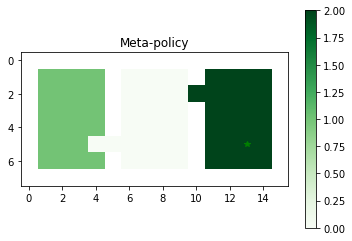

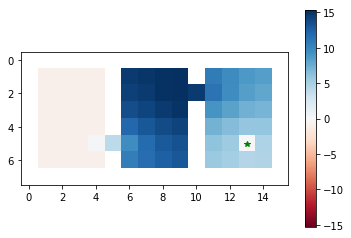

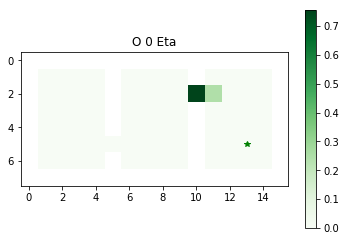

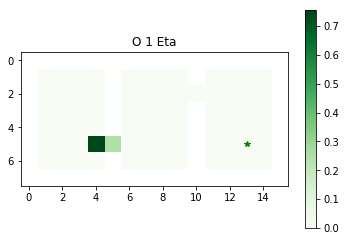

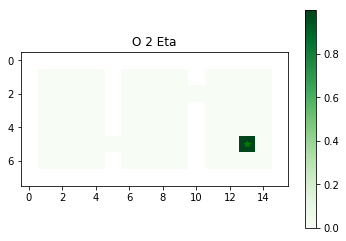

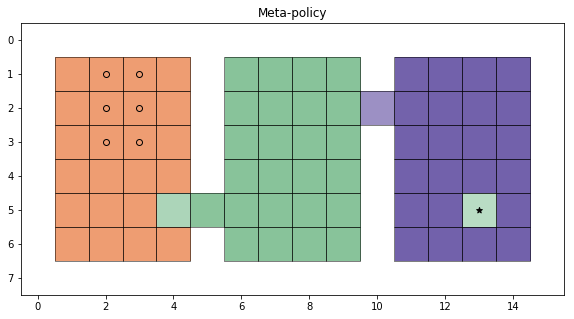

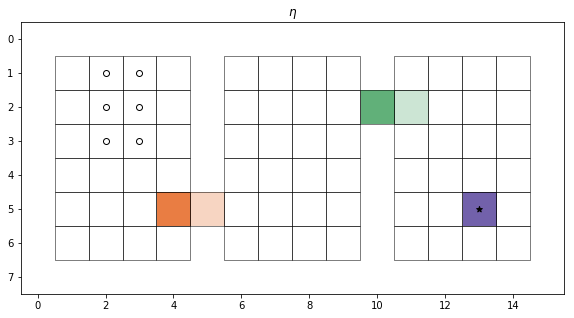

In [261]:
# 808037197 21.746
# 724672716 21.73847
#d=ol(env3, seed=816945576, colorbar=False, savefig='env3', reset=100, search_cost=env3.rw_search_cost/50, progress=25, grad_steps=300, lr=0.3, num_options=3)#, discount=0.95, terminal_reward=+30)
d=ol(env3, seed=816945576, colorbar=False, savefig='env3', reset=100, search_cost=env3.rw_search_cost/50, progress=25, grad_steps=300, lr=0.2, num_options=3)#, discount=0.95, terminal_reward=+30)


#d=ol(env3, term_max=2.0, search_cost=env3.rw_search_cost/50, progress=30, grad_steps=300, lr=0.5, num_options=3, terminations=d[0])

# 903560482 21.740 looks good!
# 816945576 21.73846 is so good

In [344]:
# defunct...

#%time d=ol(env3, search_cost=env3.rw_search_cost/env3.rw_search_cost.max()*30, progress=25, grad_steps=200, lr=0.2, num_options=3, discount=0.95)

#%time d=ol(env3, seed=621288440, search_cost=env3.rw_search_cost/env3.rw_search_cost.max()*10, progress=30, grad_steps=300, lr=0.1, num_options=3, terminal_reward=+100)

# mid-point option. LR needs to be 0.5 to get the 5.08 solution, 0.1 LR gives 6.7 solution.
#d=ol(env3, seed=755173143, search_cost=env3.rw_search_cost/env3.rw_search_cost.max()*10, progress=30, grad_steps=300, lr=0.5, num_options=3)#, discount=0.95, terminal_reward=+30)

In [120]:
# Shows this isn't a very good method yet...
# Making it longer doesn't help, unfortunately.

# now 3 rooms with a wider hall...
env = env3wide = diffplan.Grid('''
xxxxxxxxxxxxxxxx
x SS           x
x SS x         x
x    x    x    x
x    x    x    x
x    x    x  G x
x    x    x    x
xxxxxxxxxxxxxxxx
''')

%time env.bfs_search_cost = diffplan.compute_bfs_search_cost(env)
env.rw_search_cost = diffplan.compute_random_walk_search_cost(env)

CPU times: user 5.03 s, sys: 56.7 ms, total: 5.08 s
Wall time: 5.71 s


seed 226071596
24 17.655038833618164
49 17.443214416503906
74 17.42913055419922
99 17.423484802246094
99 Reset optimizer state
124 17.23444175720215
149 17.219802856445312
174 17.219249725341797
199 17.21923828125
199 Reset optimizer state
224 17.219356536865234
249 17.2191219329834
274 17.219118118286133
299 17.219120025634766
299 Reset optimizer state


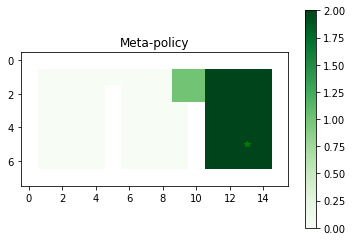

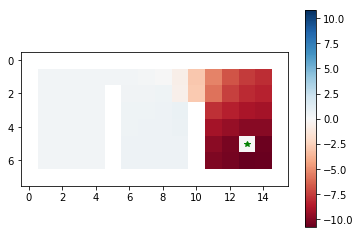

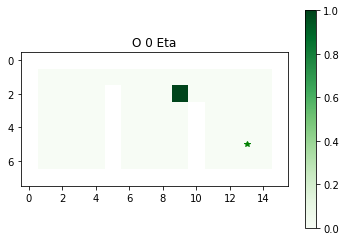

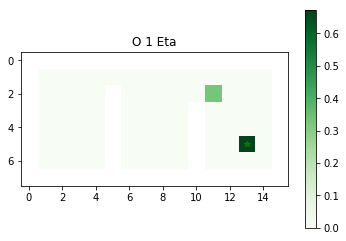

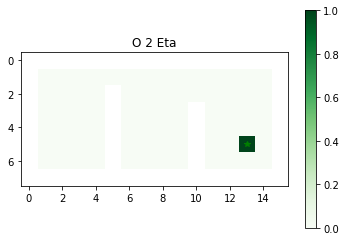

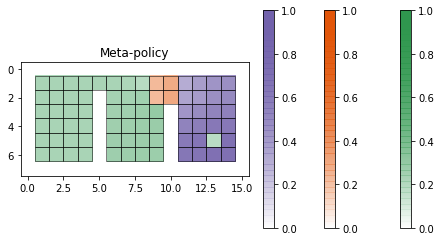

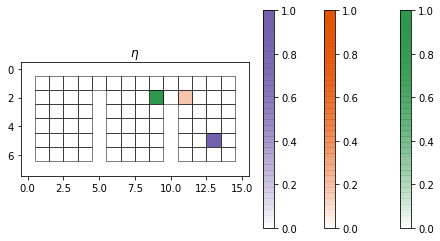

In [121]:
d=ol(env3wide, reset=100, search_cost=env3wide.rw_search_cost/50, progress=25, grad_steps=300, lr=0.3, num_options=3)


# trying some more grids... here's a 6er

In [137]:
grid = '''
xxxxxxxxxxxxxxxxxxx
xSSSSSx     x     x
xSSSSSx G   x     x
xSSSSSx     x     x
xSSSSSx           x
xSSSSSx     x     x
xx xxxxxxxxxxxxxx x
x     x     x     x
x           x     x
x     x     x     x
x     x           x
x     x     x     x
xxxxxxxxxxxxxxxxxxx
'''
_grid = '''
xxxxxxxxxxxxxxxxxxx
xSSSSSx     x     x
xSSSSSx G   x     x
xSSSSSx     x     x
xSSSSSx           x
xSSSSSx     x     x
xx xxxx xxxxx xxxxx
x     x     xSSSSSx
x           xSSSSSx
x     x     xSSSSSx
x     x      SSSSSx
x     x     xSSSSSx
xxxxxxxxxxxxxxxxxxx
'''
env4 = diffplan.Grid(grid)

%time env4.bfs_search_cost = diffplan.compute_bfs_search_cost(env4)
env4.rw_search_cost = diffplan.compute_random_walk_search_cost(env4)

CPU times: user 28.5 s, sys: 234 ms, total: 28.7 s
Wall time: 29.5 s


tensor(1151.0985)

seed 920967834
24 496.519287109375
49 286.9743347167969
74 251.53292846679688
99 234.87828063964844
124 224.3837432861328
149 217.2177734375
174 212.1066436767578
199 208.3321533203125
199 Reset optimizer state
224 189.24716186523438
249 188.88613891601562
274 188.80531311035156
299 188.76107788085938
324 188.7309112548828
349 188.70907592773438
374 188.6929931640625
399 188.68048095703125
399 Reset optimizer state
424 188.61021423339844
449 188.59011840820312
474 187.88858032226562
499 187.6150360107422


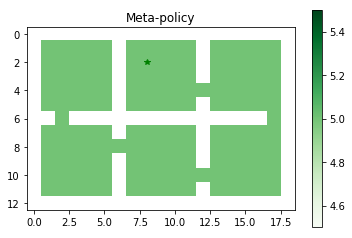

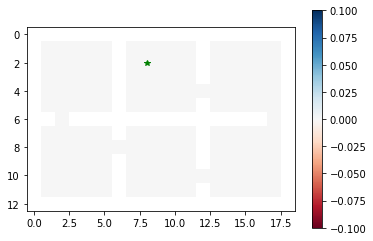

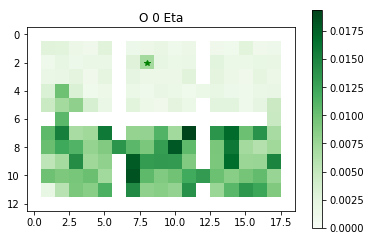

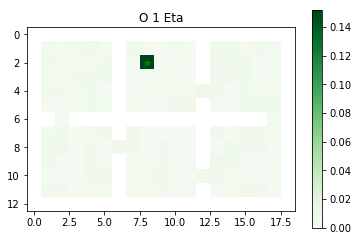

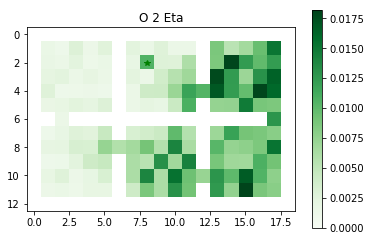

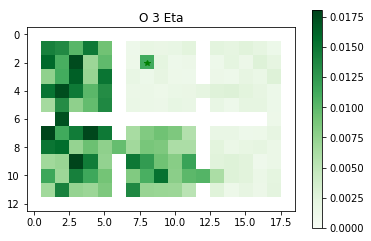

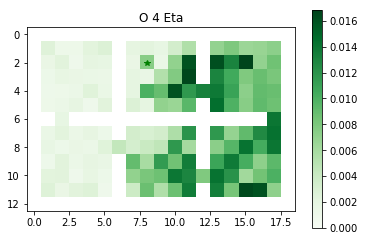

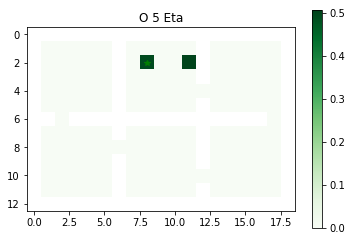

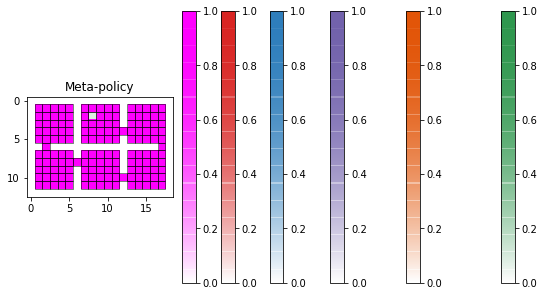

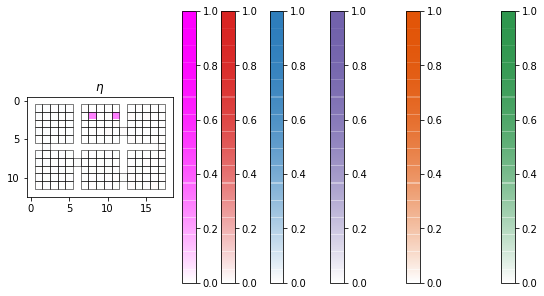

In [139]:
d=ol(env4, reset=200, search_cost=env4.bfs_search_cost, progress=25, grad_steps=500, lr=0.1, num_options=6)

seed 218111356
24 157.43894958496094
49 120.0825424194336
74 118.87626647949219
99 117.31965637207031
124 115.89453125
149 114.87020874023438
174 114.68314361572266
199 114.65279388427734
199 Reset optimizer state
224 113.94784545898438
249 113.59986114501953
274 113.3398208618164
299 113.33465576171875
324 113.33367919921875
349 113.33324432373047
374 113.33296966552734
399 113.33273315429688
399 Reset optimizer state
424 113.33141326904297
449 113.33129119873047
474 113.33110046386719
499 113.3310775756836
524 113.3310775756836
549 113.33106231689453
574 113.33106231689453
599 113.33106231689453
599 Reset optimizer state
624 113.3310775756836
649 113.33106231689453
674 113.3310775756836
699 113.33106231689453


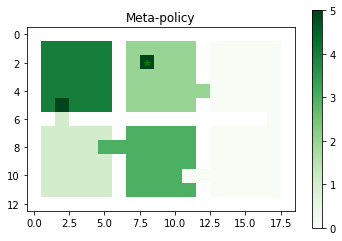

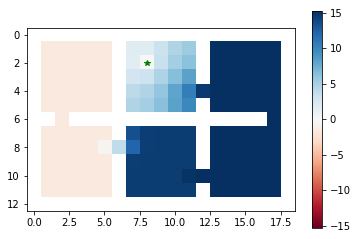

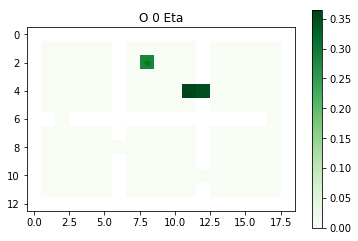

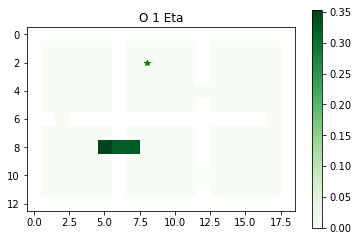

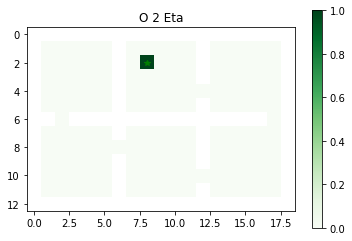

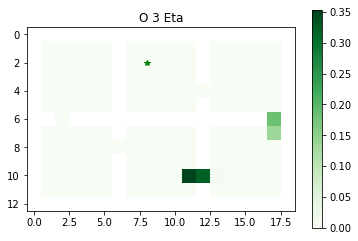

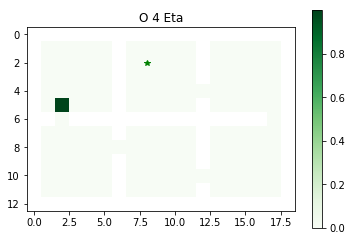

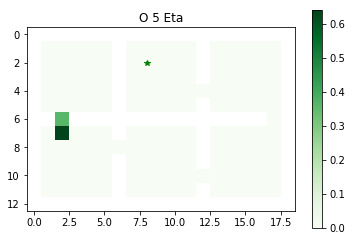

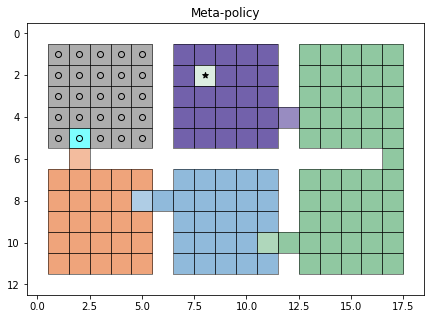

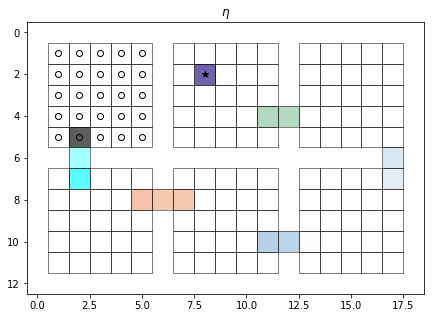

In [262]:
d=ol(env4, seed=218111356, savefig='env6', colorbar=False, reset=200, search_cost=env4.rw_search_cost/50, progress=25, grad_steps=700, lr=0.1, num_options=6)
# 113.4034194946289
# 113.3898
# 282417608 113.3677
# 218111356 113.331
# 453531904 113.3223

# 4 rooms

In [67]:
grid = '''
xxxxxxxxxxxxx
xSSSSSx     x
xSSSSSx     x
xSSSSS      x
xSSSSSx     x
xSSSSSx     x
xx xxxxxx xxx
x     x     x
x     x     x
x     x     x
x           x
x     x    Gx
xxxxxxxxxxxxx
'''
grid = '''
xxxxxxxxxxxxx
xSSSSSxSSSSSx
xSSSSSxSSSSSx
xSSSSSSSSSSSx
xSSSSSxSSSSSx
xSSSSSxSSSSSx
xxSxxxxxx xxx
xSSSSSx     x
xSSSSSx     x
xSSSSS      x
xSSSSSx     x
xSSSSSx    Gx
xxxxxxxxxxxxx
'''
env4 = diffplan.Grid(grid)

%time env4.bfs_search_cost = diffplan.compute_bfs_search_cost(env4)
env4.rw_search_cost = diffplan.compute_random_walk_search_cost(env4)

CPU times: user 10.3 s, sys: 75.9 ms, total: 10.4 s
Wall time: 10.8 s


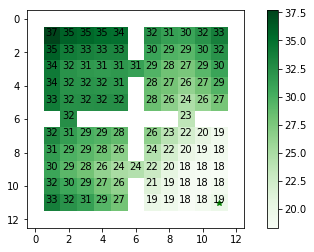

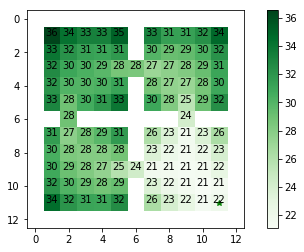

In [75]:
show_new_option_cost(env4, env4.bfs_search_cost/5)
show_new_option_cost(env4, env4.rw_search_cost/50, discount=0.95)

seed 166938538
24 66.80052947998047
49 35.213050842285156
74 29.306594848632812
99 26.586957931518555
124 24.925325393676758
149 23.80888557434082
174 23.01734161376953
199 22.43315887451172
199 Reset optimizer state
224 18.807329177856445
249 18.685462951660156
274 18.676578521728516
299 18.672056198120117
324 18.668657302856445
349 18.665985107421875
374 18.663864135742188
399 18.66215705871582
399 Reset optimizer state
424 18.65132713317871
449 18.65105628967285
474 18.651004791259766
499 18.65097999572754


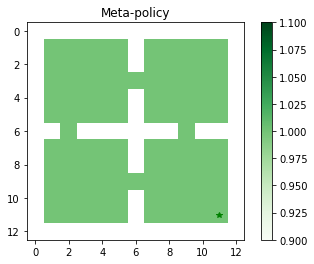

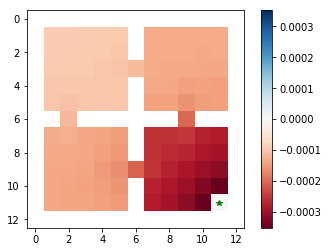

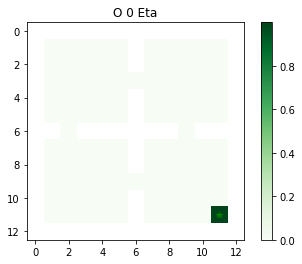

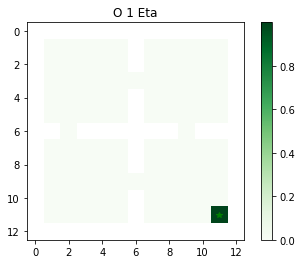

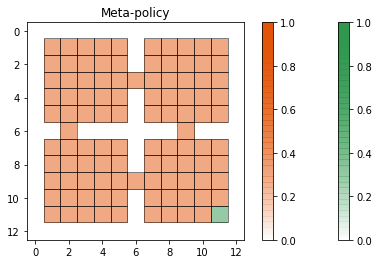

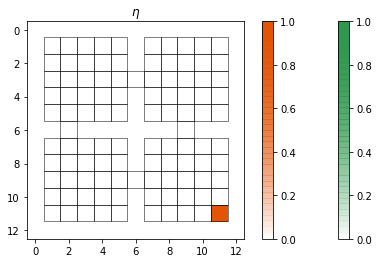

In [77]:
#d=ol(env4, reset=200, search_cost=3+env4.rw_search_cost/20, progress=25, grad_steps=500, lr=0.1, num_options=5, discount=0.8, terminal_reward=+50)
d=ol(env4, reset=200, search_cost=env4.rw_search_cost/50, progress=25, grad_steps=500, lr=0.1, num_options=2)
